In [10]:
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
%matplotlib inline

In [11]:
X = np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]])
pca = PCA(n_components=1).fit(X)

In [12]:
pca

PCA(copy=True, iterated_power='auto', n_components=1, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [13]:
pca.score(X)

-2.304225812202577

In [14]:
Xp = pca.transform(X)
Xp

array([[ 1.38340578],
       [ 2.22189802],
       [ 3.6053038 ],
       [-1.38340578],
       [-2.22189802],
       [-3.6053038 ]])

In [15]:
from sklearn.preprocessing import StandardScaler

In [16]:
def standardScaler(X):
    mu = X.mean(axis=0)
    sigma = np.sqrt(X.var(axis=0))
    new_X = (X - mu) / sigma
    return new_X

In [17]:
ss = StandardScaler().fit(X)
ss.fit_transform(X)

/opt/anaconda/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


array([[-0.46291005, -0.70710678],
       [-0.9258201 , -0.70710678],
       [-1.38873015, -1.41421356],
       [ 0.46291005,  0.70710678],
       [ 0.9258201 ,  0.70710678],
       [ 1.38873015,  1.41421356]])

In [18]:
new_X = standardScaler(X)
new_X

array([[-0.46291005, -0.70710678],
       [-0.9258201 , -0.70710678],
       [-1.38873015, -1.41421356],
       [ 0.46291005,  0.70710678],
       [ 0.9258201 ,  0.70710678],
       [ 1.38873015,  1.41421356]])

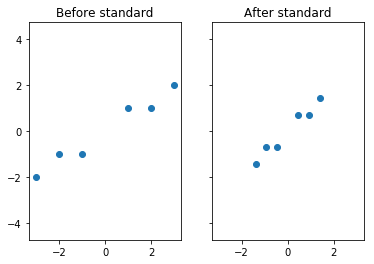

In [19]:
fig, axes = plt.subplots(ncols=2, sharex=True, sharey=True)
axes[1].axis('equal')
axes[0].set_title('Before standard')
axes[1].set_title('After standard')
axes[0].scatter(X[:,0],X[:,1])
axes[1].scatter(new_X[:,0],new_X[:,1])
plt.show()

In [20]:
pcaX = np.c_[Xp, np.zeros(6) ] 

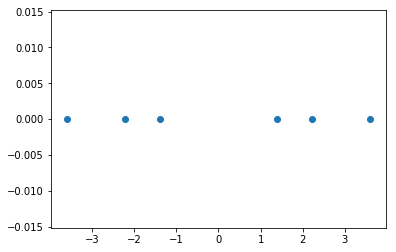

In [21]:
plt.scatter(pcaX[:,0], pcaX[:,1])
plt.show()

In [22]:
def PCA(X, n_components):
    # normalize to zero mean
    mu = X.mean(axis=0)
    X = X - mu
    
    # eigenvectors of covariance matrix
    sigma = X.T @ X
    eigvals, eigvecs = np.linalg.eig(sigma)
    
    # principal components
    order = np.argsort(eigvals)[::-1]
    components = eigvecs[:, order[:n_components]]
    
    # projection
    Z = X @ components
    
    # result
    return Z, components

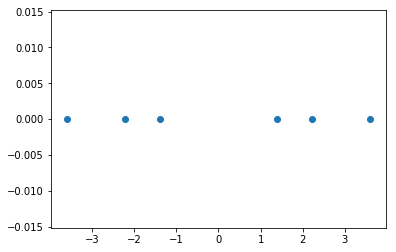

In [23]:
# PCA
projection, components = PCA(X, n_components=1)

# convariance matrix of projected data
(projection.T @ projection).round(3)

projection[:,0].shape
# plot original data & principal components
plot = plt.scatter(projection[:,0], np.zeros(6),)
plt.show()

In [24]:
components.shape, X.shape

((2, 1), (6, 2))

In [25]:
n_components = np.r_[np.zeros((1,2)), components.T]

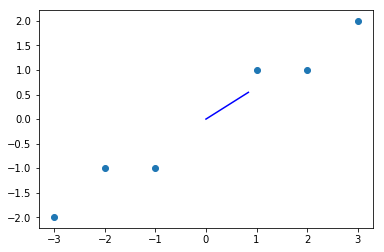

In [26]:
plt.scatter(X[:,0],X[:,1])
plt.plot(n_components[:,0],n_components[:,1], 'b')
plt.plot()
plt.show()

In [27]:
pca.singular_values_

array([6.30061232])

In [30]:
# eigenvectors of covariance matrix
sigma = (1/len(X)-1)*(X.T @ X)
eigvals, eigvecs = np.linalg.eig(sigma)

In [31]:
eigvals

array([-33.08142967,  -0.25190366])

In [36]:
order = np.argsort(eigvals)[::-1]
order

array([1, 0])

In [37]:
components = eigvecs[:, order[:n_components]]

TypeError: only integer scalar arrays can be converted to a scalar index